In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
dataset = pd.read_csv("data_cleaned.csv")

In [3]:
dataset

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Visibility_MeanRatio,Outlet_Years,Outlet,Item_Fat_Content_Low Fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Drink,Item_Category_Food,Item_Category_Non-consumable
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,0.931078,14,9,1,...,0,1,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,0.933420,4,3,0,...,0,1,0,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,0.960069,14,9,1,...,0,1,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.017834,182.0950,OUT010,732.3800,1.000000,15,0,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.009780,53.8614,OUT013,994.7052,1.000000,26,1,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,141.3154,OUT046,0.0000,0.874729,16,8,0,...,0,0,1,0,1,0,0,0,1,0
14200,FDD47,7.60,0.142991,169.1448,OUT018,0.0000,0.878292,4,3,0,...,0,1,0,0,0,1,0,0,1,0
14201,NCO17,10.00,0.073529,118.7440,OUT045,0.0000,1.162245,11,7,0,...,0,0,1,0,1,0,0,0,0,1
14202,FDJ26,15.30,0.088380,214.6218,OUT017,0.0000,1.000000,6,2,0,...,0,0,1,0,1,0,0,0,1,0


# Splitting dataset into input and output data set

In [4]:
dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Item_Outlet_Sales', 'Item_Visibility_MeanRatio',
       'Outlet_Years', 'Outlet', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Non-Edible', 'Item_Fat_Content_Regular',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Category_Drink',
       'Item_Category_Food', 'Item_Category_Non-consumable'],
      dtype='object')

## Dropping ID columns

In [5]:
X = dataset.drop(columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [6]:
X

,Item_Weight,Item_Visibility,Item_MRP,Item_Visibility_MeanRatio,Outlet_Years,Outlet,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Drink,Item_Category_Food,Item_Category_Non-consumable
0,9.30,0.016047,249.8092,0.931078,14,9,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,0.933420,4,3,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,17.50,0.016760,141.6180,0.960069,14,9,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,19.20,0.017834,182.0950,1.000000,15,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.009780,53.8614,1.000000,26,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,0.013496,141.3154,0.874729,16,8,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0
14200,7.60,0.142991,169.1448,0.878292,4,3,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
14201,10.00,0.073529,118.7440,1.162245,11,7,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
14202,15.30,0.088380,214.6218,1.000000,6,2,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0


In [7]:
y= dataset['Item_Outlet_Sales']

In [8]:
y

0        3735.1380
1         443.4228
2        2097.2700
3         732.3800
4         994.7052
           ...    
14199       0.0000
14200       0.0000
14201       0.0000
14202       0.0000
14203       0.0000
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

# Train test split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)


In [10]:
X_train

,Item_Weight,Item_Visibility,Item_MRP,Item_Visibility_MeanRatio,Outlet_Years,Outlet,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Drink,Item_Category_Food,Item_Category_Non-consumable
11133,15.850,0.007187,41.1480,0.927507,6,2,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
3804,8.975,0.009057,104.0990,0.862686,9,6,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
9532,17.750,0.098264,241.8196,0.879677,6,2,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
318,13.350,0.139735,147.5392,1.030157,11,7,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3611,8.510,0.052240,141.9470,1.177809,6,2,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,15.600,0.117575,75.6670,0.879677,6,2,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
13418,9.800,0.106717,178.3370,1.036903,16,8,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
5390,17.600,0.018944,237.3590,1.001096,11,7,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
860,20.350,0.054363,117.9466,0.964144,6,2,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


# Model Selection

In [11]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('Ridge', Ridge()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [12]:
# Test options and evaluation metric using Root Mean Square error method
num_folds = 10
seed = 7
RMS = 'neg_mean_squared_error'

In [13]:
results = []
names = []
scoring = RMS
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -2335072.068366 (111984.024854)
LASSO: -2334709.085895 (112731.179612)
Ridge: -2335125.967553 (112361.682119)
KNN: -2795474.233727 (142213.768826)
CART: -4629013.180026 (283231.360031)


/Users/asadimam/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/asadimam/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/asadimam/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/asadimam/opt/anaconda3/lib/

SVR: -3481853.141661 (246636.209189)


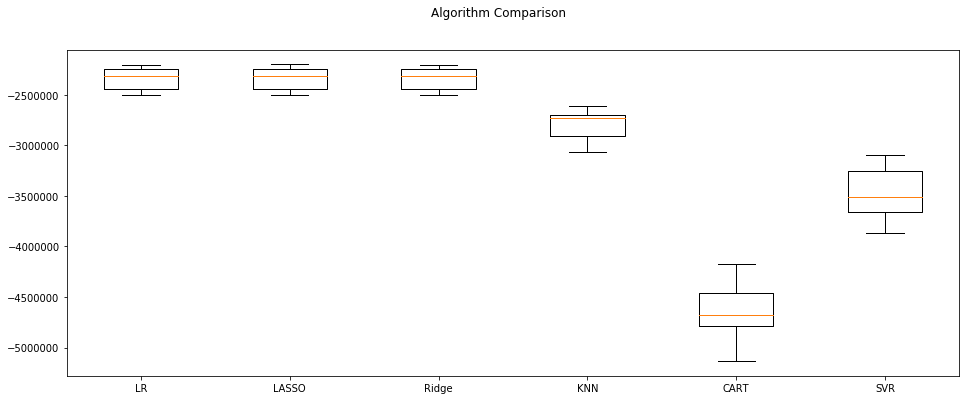

In [14]:

fig = plt.figure(figsize=(16,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [15]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
# pipelines.append(('ScaledRidge', Pipeline([('Scaler', StandardScaler()),('RIDGE', RIDGE())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=RMS)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


ScaledLR: -2335364.335120 (111958.093866)
ScaledLASSO: -2335028.602027 (112539.230532)
ScaledKNN: -2810879.443234 (132249.235213)
ScaledCART: -4639780.873960 (246953.239775)
ScaledSVR: -3277592.154049 (234786.323725)


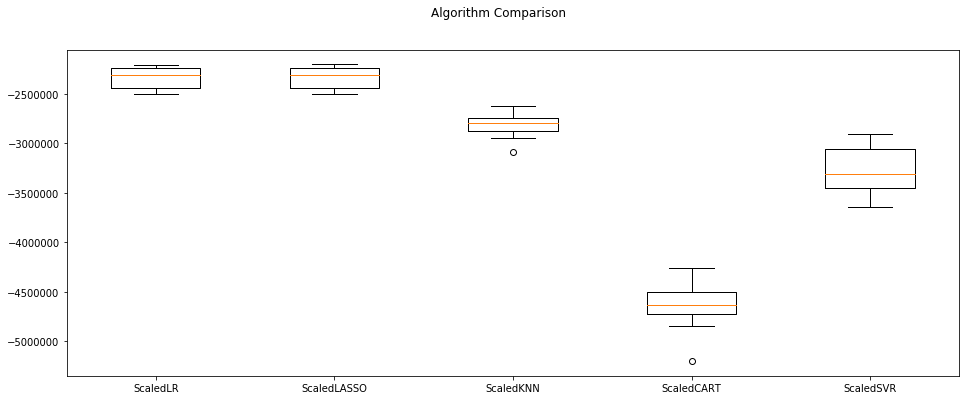

In [16]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Trying the manual method

## Multilinear regression

In [17]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
regressor.score(X_train,y_train)

0.20548943011148535

## Decision tree regressor

In [33]:
DT_regressor = DecisionTreeRegressor(random_state = 0)
DT_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [35]:
DT_regressor.score(X_train,y_train)

1.0

This is a classic sign of overfitting

## KNN

In [31]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [38]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)



KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [40]:
knn.score(X_train,y_train)

0.36305089117959943

## Random Forest

In [42]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 10, random_state = 0)
RF.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [43]:
RF.score(X_train,y_train)

-0.23595437513756812

## Ridge 

In [48]:
from sklearn.linear_model import Ridge
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
Ridge()

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [49]:
clf.score(X_train,y_train)

0.20547979250950055

## Lasso 

In [50]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
Lasso(alpha=0.1)
print(lasso.coef_)

[  12.99285926   -6.78533968  593.95235622   28.57597322 -187.16625127
   37.51157679   -0.           -0.            8.82744975   50.08998677
    0.          -58.64272151  171.60067559  -13.12082035    0.
 -366.42599744  -80.83387888  -89.7389216   378.23362101   -4.26592229
   17.10350892   -0.        ]


/Users/asadimam/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3892623208.8285904, tolerance: 3330537.368909213
  positive)


In [51]:
lasso.score(X_train,y_train)

0.20537346468266038

# Prediction